# Acoustic Phonetics

성능 좋은 음성 인식 모델을 만들기 위해서는 raw waveform 특성 등에 대해 배경 지식이 있어야 합니다. 디지털 변환, 멜 스케일, 소스-필터 이론 등 음향 음성학 기초에 대해 살펴봅니다.


## Wave

`웨이브(wave, 파동)`이란 반복적으로 진동(oscillate)하는 신호(singal)를 의미합니다. 하나의 웨이브인 단순파(simple wave)와 여러 웨이브로 구성된 복합파(complex wave)로 나누어 생각해볼 수 있습니다. 푸리에 정리(Fourier Theorem)에 따르면 아무리 복잡해보이는 웨이브도 삼각함수인 사인(sine)이나 코사인(cosine)의 합으로 나타낼 수 있습니다. 단순파(파란색 실선)를 도시한 그림1을 봅시다.

그림1에서 $x$축은 시간(time)을 가리킵니다. 보통 $x$축의 단위로 초(second)를 씁니다. $y$축은 다양한 방식으로 표기되는데요. 보통 음압(sound pressure)이 사용됩니다. 음압이란 공기 입자가 진동에 의해 인접 공기 입자를 미는 힘입니다. 사람 말소리가 음성 마이크에 달린 진동판을 울리게 하는 방식으로 녹음하게 된다고 하는데요. 이 진동판의 떨림이 전기 신호를 얼마나 강하게 혹은 약하게 하는지 정도가 $y$축을 구성한다 보면 될 것 같습니다.


## **그림1** Simple Wave
<img src="https://i.imgur.com/zlJfgBZ.png" width="400px" title="source: imgur.com" />


진폭(amplitude)이란 웨이브의 최대값입니다(녹색 실선). 사이클(cycle)이란 패턴의 반복을 의미합니다. 주기(period 혹은 wavelength)란 한 사이클을 도는 데 걸리는 시간을 가리킵니다(붉은색 실선). 그림1에서는 붉은색 실선으로 표시된 구간의 파란색 실선의 웨이브가 사이클 1회를 구성하고 있습니다. 주파수(frequency)란 1초에 몇 번 주기가 반복되는지(cycles per second)를 가라킵니다. 보통 `cycles per second`를 헤르츠(hertz, 줄여서 Hz)라고 표기합니다. 주기 $T$와 주파수 $f$ 사이에는 수식1과 같은 관계가 있습니다.

## **수식1** 주기와 주파수 사이의 관계

$$T=\frac { 1 }{ f }$$


그림2는 사람 말소리(모음 iy)를 그려놓은 것입니다. 주기가 길고 짧은 여러 개의 단순파의 합으로 복합파 형태로 나타나고 있음을 알 수 있습니다. 그림2의 웨이브는 그림1처럼 깔끔한 사인 곡선 형태는 아니지만 주파수를 계산할 수 있습니다. 패턴이 계속 반복되고 있거든요. 그림2에서 사이클이 10회 반복되는 데 걸린 시간이 0.03875초입니다. 따라서 이 웨이브의 주파수는 10/0.03875, 즉 258Hz입니다. 


## **그림2** Speech Sound Wave
<img src="https://i.imgur.com/e8nxBkp.png" width="500px" title="source: imgur.com" />


---

## Digitization

지금까지 다룬 웨이브는 기본적으로 아날로그(analog) 형태입니다. 자연에서 얻는 신호는 대개 그렇듯이 그림3처럼 연속적인(continous) 값을 지닙니다. 하지만 이런 신호를 컴퓨터가 처리하게 하려면 디지털(digital)로 바꿔줘야 합니다. 이번 챕터에서는 말소리를 디지털 신호로 변환하는 과정을 차례대로 살펴보겠습니다.


## **그림3** original signal
<img src="https://i.imgur.com/OfqCYUs.png" width="300px" title="source: imgur.com" />

### Sampling


음성 신호의 디지털 변환의 첫 단추는 샘플링(sampling)입니다. 일정한 시간 간격마다 음성 신호를 샘플해서 연속 신호(continous signal)을 이산 신호(discrete signal)로 변환합니다. 이때 1초에 몇 번 샘플하는지 나타내는 지표가 바로 sampling rate입니다. 예컨대 1초에 4만4100번 샘플한다면 sampling rate $f_s$는 44100, 또는 44.1KHz가 됩니다. 다시 말해 44.1KHz의 샘플링된 신호는 1초에 44100개의 실수(real number)로 구성되어 있습니다.


## **그림4** sampling
<img src="https://i.imgur.com/zgGDBZ2.png" width="300px" title="source: imgur.com" />


우리는 그림3과 같은 사람 말소리를 어딘가에 전송하거나 녹음해 두었다가 스피커로 재생하려고 합니다. 디지털 변환을 하기 위해 어쩔 수 없이 샘플링을 하게 돼 신호의 정보량이 일부 손실됐지만 샘플링된 신호(그림4)로부터 원래 신호(그림3)으로 복원하고 싶은 거죠. 그렇다면 어떻게 해야 최대한 자연스럽게 원래 신호를 복원할 수 있을까요? 

이와 관련해 `나이퀴스트 정리(Nyquist Theorem)`가 유용하게 쓰입니다. 원래 신호가 가진 최대 주파수의 2배 이상으로 샘플링하면 원래 신호를 충분히 재생할 수 있다는 정리입니다. 보통 인간의 가청 주파수 영역대는 20~20000Hz로 알려져 있는데요. 40000Hz 이상의 sample rate로 샘플링을 실시하면 사람이 들을 수 있는 거의 모든 소리를 복원할 수 있다는 것입니다. 이때의 목표 음성 신호의 최대 주파수(20000Hz)를 나이퀴스트 주파수라고 합니다.

**Anti-Aliasing**
<br>
나이퀴스트 정리에 따라 샘플링을 실시한다면 원래 음성 신호 복원에 이론적으론 문제가 없습니다. 하지만 자연의 소리에는 나이퀴스트 주파수(목표 주파수)보다 높은 주파수 성분이 의도와 달리 끼어있을 수 있습니다. 다음의 하단 그림을 봅시다. 나이퀴스트 정리에 따라 6번 샘플링하고 있지만 원래 신호(검은색 실선)의 주파수는 이보다 높습니다. 이 때문에 샘플링된 신호로부터 복원한 결과(파란색 실선)에 왜곡이 생기고 있음을 알 수 있습니다. 이같이 샘플링 때문에 저주파로 왜곡된, 나이퀴스트 주파수보다 높은 원래 신호의 고주파 성분을 `alias frequency` 혹은 `ghost frequency`라고 합니다.
<br>
<img src="https://i.imgur.com/T0Z93Ft.png" width="500px" title="source: imgur.com" />
<br>
이런 현상을 막기 위해 쓰는 것이 `Anti-aliasing filter`입니다. 이 필터는 샘플을 수집하기 이전 아날로그 신호에 적용합니다. 나이퀴스트 주파수보다 낮은 주파수 영역대만 통과시키는 bandpass filter를 써서 나이퀴스트 주파수보다 높은 주파수 영역대를 샘플링 하기 전에 미리 없애놓는 것이죠.
<br>
주파수 도메인에서 이상적인 모양의 bandpass filter는 아래 그림의 a와 같을 겁니다. 하지만 필터가 아래 같이 구형(rectangular)이 되려면 시간 도메인에서 필터의 길이(length)가 무한해야 합니다(자세한 내용은 [이 글](https://ratsgo.github.io/speechbook/docs/neuralfe/sincnet)을 참고). 이 때문에 현실적으로는 b 같은 모양의 필터를 씁니다.
<br>
<img src="https://i.imgur.com/tM4oVRo.jpg" width="300px" title="source: imgur.com" />
<br>
보통 CD 음질의 sample rate가 44.1KHz인데요. 다음의 세 가지 점을 종합해 보면 왜 44.1KHz인지 가늠해볼 수 있습니다. (1) 인간의 가청 주파수가 20~20000Hz이다. (2) 나이퀴스트 정리에 따라 목표 주파수(20000Hz)의 2배를 샘플링해야 원래 신호를 복원할 수 있다. (3) 시간 도메인에서 유한한 길이의 bandpass filter를 쓰려면 위 그림처럼 transition band가 존재하게 되므로 이만한 버퍼가 되는 주파수 영역대가 추가로 필요하다.

### Quantization


다음 단계는 샘플링된 신호에 양자화(quantization)을 실시하는 과정입니다. 양자화란 실수 범위의 이산 신호를 정수(integer) 이산 신호로 바꾸는 걸 의미합니다. 그림5와 같습니다. 만약 8비트 양자화를 실시한다면 실수 범위의 이산 신호가 `-128~127`의 정수로, 16비트 양자화를 한다면 실수 범위의 이산 신호가 `-32768~32767` 정수로 변환됩니다. 양자화 비트 수(Quantization Bit Depth)가 커질 수록 원래 음성 신호의 정보 손실을 줄일 수 있지만 그만큼 저장 공간이 늘어나는 단점이 있습니다. 


## **그림5** quantization

<img src="https://i.imgur.com/rqXLuKL.png" width="300px" title="source: imgur.com" />


양자화 실시에 따른 정보 손실을 양자화 잡음(noise)이라고 합니다. 이 양자화 잡음을 줄이기 위해 압신(comapnding) 기법을 씁니다. 압신이란 압축(compression)과 신장(expanding)을 동시에 일컫는 용어로, 양자화 잡음을 줄이기 위해 정보 압축과 해제와 관련해 특정 룰을 약속해 놓는 것이라고 이해하면 좋을 것 같습니다. 압신과 관련해서는 대표적으로 $\mu$-law를 씁니다. 


양자화 대상 실수 범위의 이산 신호를 $x$일 때 해당 신호를 양자화하는 함수 $F$는 수식2와 같습니다(양자화 비트 수가 8일 때 $\mu$는 255) 수식2에 쓰인 sign function은 수식3처럼 정의됩니다.


## **수식2** $\mu$-law

<img src="https://i.imgur.com/35ZcFfe.png" width="350px" title="source: imgur.com" />

## **수식3** Sign function

<img src="https://i.imgur.com/2hEYkXX.png" width="250px" title="source: imgur.com" />

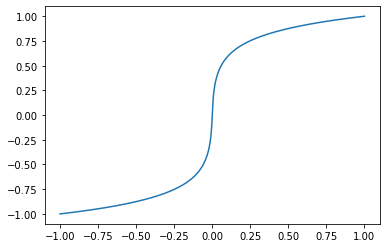

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,1000)
y = np.sign(x)*(np.log(1+255*np.abs(x))/np.log(1+255))
plt.plot(x,y)
plt.show()




그림6의 $x$축은 양자화 이전 실수 범위의 이산 신호, $y$축은 양자화 이후 정수 범위의 이산 신호를 각각 나타냅니다. 압신 기법을 전혀 쓰지 않을 경우(no companding) 양자화 이전과 이후의 신호 범위가 선형 관계를 이루는 것을 알 수 있습니다. 

그런데 $\mu$-law로 압신을 하면 입력 신호의 값이 작으면 조밀하게 양자화가 되고, 신호의 값이 크면 듬성듬성 양자화가 되고 있음을 확인할 수 있습니다. 다시 말해 진폭(amplitude)이 작은 입력 신호에 대해서는 양자화 계단 크기(Quantization Step Size)를 적게 하고, 진폭이 큰 경우에는 양자화 계단 크기를 크게 하는 것이라는 이야기입니다(비선형 압신).

사람은 진폭이 작은 신호는 세밀히 인식하고, 진폭이 큰 신호는 상대적으로 덜 세밀하게 인식하는 경향이 있다(`human hearing is more sensitive at small intensities than large ones`)고 하는데요. 우리는 사람이 듣기에 자연스러운 음성 신호의 압축과 해제에 관심이 있으므로 $\mu$-law는 사람의 소리 인식에 유리한 압신 방법이라고 볼 수 있겠습니다.


## **그림6** quantization 효과
<img src="https://i.imgur.com/MHF7DpY.png" width="400px" title="source: imgur.com" />

### Encoding


인코딩(encoding)이란 정보 소스를 디지털 형식으로 변환, 압축, 저장하는 일련의 과정을 의미합니다. 지금까지 처리한 입력 신호를 전송 혹은 처리가 가능한 형태의 파일로 바꿉니다. 대표적으로 **wav**, **flac**, **mp3** 등을 많이 씁니다. wav는 압축하지 않은 오디오 포맷, flac은 무손실 압축, mp3는 손실 압축을 그 특징으로 합니다.


---

## Loudness


우리가 `어떤 소리가 크다 혹은 작다를 느끼는 것`
(loudness)은 해당 음성 신호의 파워(power)와 관계가 있다고 합니다. 파워는 신호의 진폭(amplitude)과 직접 관련이 있는데요. 요컨대 사람은 진폭이 큰 음성 신호를 큰/시끄러운 소리로 인식하는 경향이 있다는 것이지요. 이를 직관적으로 나타낸 것은 그림7입니다. 


## **그림7** loudness와 power

<img src="https://i.imgur.com/uuNhyco.png" width="300px" title="source: imgur.com" />


이산 신호의 샘플 수가 $N$개일 때 power의 수식적 정의는 수식4와 같습니다. power 말고도 intensity라는 지표도 자주 쓰입니다(수식5). 사람이 들을 수 있는 가장 작은 소리($P_0$) 대비 데시벨(dB) 기준으로 power가 얼마나 큰지 나타내는 지표라고 볼 수 있겠습니다.


## **수식4** power

$$\text{Power}=\frac { 1 }{ N } \sum _{ i=1 }^{ N }{ { x }_{ i }^{ 2 } }$$


## **수식5** intensity

$$\text{Intensity}=10\log _{ 10 }{ \frac { 1 }{ N{ P }_{ 0 } } \sum _{ i=1 }^{ N }{ { x }_{ i }^{ 2 } }  }$$

**decibel**
<br>
`벨(bel)`은 어떤 값과 값 사이의 상대 비율을 나타내는 단위로 소리의 크기를 나타낼 때도 쓰입니다. 전화기를 발명한 알렉산더 그레이엄 벨(Alexander Graham Bell)의 업적을 기리는 의미에서 단위명에 그의 이름을 붙인 것입니다. 하지만 벨은 상용 레벨에서 쓰기엔 너무 커서 실전에서는 10분의 1 벨, 즉 데시벨(decibel, dB)을 주로 씁니다. 인간이 인식할 수 있는 가장 작은 소리의 진폭을 $P_0$($2\times10^{-5}$), 측정 대상 소리를 $P_1$이라고 할 때 해당 소리의 데시벨은 다음과 같이 정의됩니다 : 
$$L_{ dB }=10\log_{ 10 }\left( { P }_{ 1 }/{ P }_{ 0 }  \right)$$

그런데 loudness와 파워(power)의 관계는 선형(linear)은 아니라고 합니다. 사람은 파워가 작은 음성 신호는 파워가 큰 신호에 비해 좀 더 세밀히 인식한다고 합니다. ($\mu$-law를 설계할 때 진폭이 작은 입력 신호를 조밀하게 양자화한 것과 연계해서 생각해보면 좋을 것 같습니다) 

아울러 사람은 특정 주파수 영역대의 신호는 상대적으로 큰 소리로 인식한다고 합니다. 다시 말해 loudness는 파워와만 관계를 지니는 것이 아니라 주파수와도 관련이 있다는 것이지요.


---

## Pitch


말소리의 높낮이를 피치(pitch)라고 합니다. 이 피치는 입력 음성 신호의 주파수와 관련이 있다고 합니다. 대체적으로 사람은 100Hz에서 1000Hz에 이르는 구간의 소리는 주파수가 커질 수록 피치 역시 높아진다고 느끼는 경향이 있다고 합니다(pitch correlates linearly with frequency). 그런데 1000Hz 이상의 구간에서는 주파수와 피치 인식 사이의 관계가 로그 형태를 띈다고 합니다(pitch correlates logarithmically with frequency). 1000Hz 이상의 구간에서는 주파수가 100배 정도 되어야 높낮이 차이를 2배라고 느끼는 정도입니다. 다시 말해 인간은 1000Hz 이상의 고주파 소리에 대해서는 저주파 음성 대비 세밀하게 인식하지 못한다는 것이지요. 


그렇다면 전체 주파수 영역대를 사람이 인식하는 피치의 단계로 나눠볼 수는 없을까요? 예컨대 전체 주파수 영역대를 총 10개로 구분한다면 해당 주파수 블록이 1단계에서 2단계가 되든, 9단계에서 10단계가 되든 사람이 인식하는 말소리 높낮이 차이를 거의 비슷하게 두도록 하자는 것입니다. 이같은 목적에 의해 도입된 것이 멜 스케일(mel scale)입니다. 다음 수식과 표와 같습니다. 아래에서 확인할 수 있는 것처럼 사람이 분간을 잘하는 1000Hz 이하 저주파 영역대는 멜 스케일이 거의 선형에 가깝도록 세밀하게, 분간을 덜 잘하는 고주파 영역대는 멜 스케일이 듬성듬성하게 변화합니다.


## **수식6** mel scale
$$m=1127\ln { \left( 1+\frac { f }{ 700 }  \right)  }$$


## **표1** mel scale

|Hz|20|160|396|670|1000|1420|1900|2450|3120|4000|5100|6600|9000|14000|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|mel|0|250|500|750|1000|1250|1500|1750|2000|2250|2500|2750|3000|3250|


---

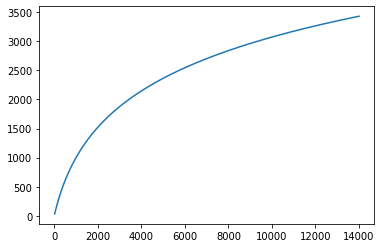

In [4]:
hz = np.linspace(20,14000,10000)
mel = 1127*np.log(1+hz/700)
plt.plot(hz,mel)
plt.show()

## Vowels


그림8은 20세 여성 화자가 발화한 "She just had a baby" 문장의 웨이브입니다. 그림8에서 확인할 수 있듯 모음(vowel)이 자음(consonant)보다 좀 더 진폭이 크고 그 패턴이 규칙적인 경향이 있습니다. 


## **그림8** "She just had a baby" 문장의 waveform
<img src="https://i.imgur.com/ftlWcp1.png" width="600px" title="source: imgur.com" />


그림9에서 확인할 수 있는 것처럼 모음은 음절(syllable)의 핵(nucleus) 역할을 합니다. 모음 없이는 음절을 구성할 수 없습니다. 사람 말소리에서 모음이 그만큼 중요하다는 이야기입니다. 이 챕터에서는 모음을 중심으로 살펴보겠습니다.


## **그림9** 음절 구조
<img src="https://i.imgur.com/xRU3CFG.png" width="400px" title="source: imgur.com" />


모음 iy(시간 도메인의 웨이브)에 푸리에 변환(Fourier Transform)을 수행해 주파수 도메인으로 변환하면 그림10과 같은 패턴을 관찰할 수 있습니다. 다시 말해 그림8의 화자가 맨 마지막 단어의 마지막 음소(iy)를 발화할 때 순간을 스냅샷을 찍어서 이를 스펙트럼으로 분석했다고 이해하면 좋겠습니다. 아래와 같이 특정 시점의 입력 음성 신호를 주파수 도메인으로 변환한 것을 스펙트럼(spectrum)이라고 합니다. 그림10에서 $x$축은 주파수, $y$축은 진폭(amplitude)을 의미합니다. 

그림10의 스펙트럼에서 음향 에너지가 몰려있는 각각의 봉우리를 포만트(Formant)라고 합니다. 그림10을 보면 540Hz에서 음향 에너지가 가장 크고 2581Hz에서 그 다음을 기록하고 있음을 확인할 수 있는데요. 전자를 1번 포만트($F1$으로 표시), 후자를 2번 포만트($F2$)라고 합니다. 이렇게 낮은 주파수 쪽에서부터 순서대로 포만트 번호를 매겨 나갑니다.


## **그림10** 모음 iy의 스펙트럼과 포만트
<img src="https://i.imgur.com/fD0AuI9.png" width="400px" title="source: imgur.com" />


포만트는 모음의 특질을 구성하는 중요 요소입니다. 사람들은 포만트가 같으면 동일한 모음으로, 포만트가 서로 다르면 서로 다른 모음이라고 인식하기 때문입니다. 그림11은 동일한 화자가 순차적으로 모음 ih, ae, uh를 발음한 것을 스펙트로그램(spectrogram)으로 표시한 것입니다. 스펙트로그램은 특정 시점의 스펙트럼을 시간 순서대로 쭉 이어 붙인 것이라고 이해하면 좋겠습니다(스펙트럼이 벡터라면 스펙트로그램은 행렬). 그림11에서 $x$축은 시간, $y$축은 주파수, 명도는 진폭을 의미합니다. 그림11에서 세 개 모음의 포만트가 각기 다름을 확인할 수 있습니다.


## **그림11** 서로 다른 모음의 스펙트로그램
<img src="https://i.imgur.com/b7EBRLk.png" width="400px" title="source: imgur.com" />


음성 인식(speech recognition)은 컴퓨터로 하여금 말소리를 사람이 느끼는 것처럼 따라하게 만드는 데 목적이 있는 만큼, 사람의 말소리 인식에 중요한 포만트 정보를 얼마나 잘 처리하느냐가 음성 인식 모델의 성능을 좌우할 것이라고 생각합니다. 

한편 말소리는 여러 주파수들로 구성되는데요. 이 주파수들 가운데 최대 공약수를 기본 주파수(fundamental frequency)라고 합니다. 말소리의 특색을 결정짓는 데 중요한 역할을 하는 주파수로 성문의 초당 진동수와 일치합니다. 배음(harmonics)이란 기본 주파수에 정수배에 해당하는 주파수로 모음, 비음(m 등), 유음(l 등)에선 그림12와 같이 규칙적으로 관찰됩니다.


## **그림12** 기본 주파수와 배음
<img src="https://i.imgur.com/gXgEgvp.png" width="600px" title="source: imgur.com" />

---

## The Source-Filter Model


음성학에서 사람의 말소리(특히 모음)가 생성되는 과정을 모델링한 이론으로 가장 널리 받아들여지고 있는 것이 `소스-필터 모델(The Source-Filter Model)`입니다. 이 모델은 사람의 성문(glottis)을 소스, 혀 입술 등 조음 기관을 필터로 봅니다. 그림13을 보면 모음 iy, ae, uw는 같은 소스로부터 파생되었지만 조음 방법에 따라(즉 필터가 바뀜에 따라) 말소리가 달라지고 있습니다. 실제 소리를 내어서 발음해보면 혀나 입술 모양 등만 바뀔 뿐 성문에서 나오는 소리는 동일하다는 걸 느낄 수 있습니다.


## **그림13** The Source-Filter Model (1)
<img src="https://i.imgur.com/bi64hhY.png" width="400px" title="source: imgur.com" />


그림14는 다른 각도에서 소스-필터 이론을 살펴본 것입니다. 모든 사람은 각기 다른 소스를 가지고 있습니다. 얼굴의 생김새처럼 음색 등이 모두 다릅니다. 하지만 같은 사람이 내는 소리(*fundamental frequency와 밀접한 관련*)는 거의 비슷합니다. 얼굴이 순식간에 바뀌지 않는 것처럼요. 그런데 혀 입술 잇몸 등 조음 기관들도 주파수를 가지고 있습니다. 성문에서 발생한 소스가 필터를 지나면서 특정 주파수가 증폭되거나 감쇄되는 현상이 일어납니다(공명 resonance). 이 과정에서 모음의 특질을 결정하는 포만트가 형성됩니다.


## **그림14** The Source-Filter Model (2)
<img src="https://i.imgur.com/IJpzp2L.png" width="400px" title="source: imgur.com" />


다음은 두 개의 소스와 두 개의 필터로 서로 다른 소리를 내는 예시입니다. 소스가 다르면 음색이나 피치가 달라지고, 필터가 다르면 모음의 종류가 달라지는 것을 확인할 수 있습니다.




## **표1** The Source-Filter Model (3) ([출처](http://splab.net/APD/G500/index-e.html))

---

In [6]:
import IPython.display as ipd
display(ipd.Audio('/content/drive/MyDrive/AI_sound/4.deeplearning_sound/2.phonetics/a_p1.wav'))
display(ipd.Audio('/content/drive/MyDrive/AI_sound/4.deeplearning_sound/2.phonetics/a_p2.wav'))
display(ipd.Audio('/content/drive/MyDrive/AI_sound/4.deeplearning_sound/2.phonetics/i_p1.wav'))
display(ipd.Audio('/content/drive/MyDrive/AI_sound/4.deeplearning_sound/2.phonetics/i_p2.wav'))



## References

- [모두의연구소 음성인식 부트캠프](https://home.modulabs.co.kr/product/%ec%9d%8c%ec%84%b1-%ec%9d%b8%ec%8b%9d-%eb%b6%80%ed%8a%b8%ec%ba%a0%ed%94%84/)
- [Speech and Language Processing (3rd ed. draft)](https://web.stanford.edu/~jurafsky/slp3/)
- [정보통신기술용어해설](http://www.ktword.co.kr/index.php)
- [splab.net](http://splab.net/APD/G500/index-e.html)
- [위키백과](https://ko.wikipedia.org)

---